# **Esercitazione 4 - Classificatori: KNN e Decision Trees**

In questa esercitazione applicheremo quanto appreso sui classificatori. Nello specifico utilizzeremo:

* **K-Nearest Neighbors (KNN):** Un algoritmo di classificazione basato sulla similarità che assegna una classe a un'osservazione in base alle classi dei suoi "K" vicini più prossimi.

* **Decision Trees:** Un modello di classificazione che utilizza una struttura ad albero per prendere decisioni basate su regole derivate dalle caratteristiche dei dati.

### **Dataset Breast Cancer**

Il dataset di riferimento sarà `breast_cancer`, un noto dataset di classificazione che contiene informazioni su tumori al seno. Le osservazioni includono diverse caratteristiche misurate sui tumori, come dimensioni, forma e altre metriche, con l'obiettivo di classificare i tumori in due categorie: **benigni** e **maligni**.

Per questa esercitazione, utilizzeremo l'intero dataset, mantenendo le classi originali. Il dataset è composto da 569 campioni e 30 caratteristiche, e utilizzeremo questo set per costruire i modelli di classificazione.

Il codice seguente esegue l'importazione delle librerie necessarie, il caricamento del dataset `breast_cancer` e la preparazione dei dati. In particolare, gestiremo i dati e le etichette in modo da facilitare l'uso dei classificatori K-Nearest Neighbors (KNN) e Decision Trees.

Dal caricamente del dataset estrarremo anche i nomi delle feature e della variabile target perchè ci servirà più avanti.

In [176]:
# Importazione delle librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [177]:
# Caricamento del dataset Iris
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

# Estraggo nomi delle feature e dei target
feature_names = dataset.feature_names
target_names = dataset.target_names

### **Divisione e standardizzazione del dataset** 

Dividiamo il dataset in `train set`, `validation set` e `test set` utilizzando le proporzioni già impostate. Successivamente applichiamo la standardizzazione utilizzando `StandardScaler`.

In [178]:
# Usare le seguenti proporzioni per il train, validation e test
train_fraction = 0.6  
validation_fraction = 0.2  
test_fraction = 0.2

# svolgimento...
num_train = int(train_fraction * X.shape[0])
num_validation = int(validation_fraction*X.shape[0])

X_train = X[:num_train]
y_train = y[:num_train]
X_validation = X[num_train:num_train+num_validation]
y_validation = y[num_train:num_train+num_validation]
X_test = X[num_train+num_validation:]
y_test = y[num_train+num_validation:]

print("Train shape:", X_train.shape)
print("Validation shape:", X_validation.shape)
print("Test shape:", X_test.shape)

#Standardizzazione
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

Train shape: (341, 30)
Validation shape: (113, 30)
Test shape: (115, 30)


## **Esercizio 1: Implementare K-NN**

Per implementare il classificatore K-Nearest Neighbors utilizzeremo la classe `sklearn.neighbors.KNeighborsClassifier` presente in `scikit-learn`. La documentazione è disponibile [a questo link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Di seguito vediamo i parametri chiave che bisogna specificare al momento della creazione dell'istanza:

* **`n_neighbors`**: Numero di vicini da considerare. Valori più elevati implicano una maggiore generalizzazione.
* **`weights`**: Specifica come pesare i vicini; può essere `uniform` (tutti i vicini hanno lo stesso peso) o `distance` (i vicini più prossimi hanno un peso maggiore).
* **`metric`**: Tipo di distanza da utilizzare per calcolare la distanza tra i punti (ad esempio, `euclidean`, `manhattan`, ecc.).

### Esempio di sintassi per istanziare, addestrare e predire

```python
# Importo KNeighborsClassifier da scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# 1. Instanzio il modello KNN
# Durante la creazione dell'istanza imposto i parametri che desidero
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# 2. Train del modello utilizzando il metodo .fit()
model.fit(X_train, y_train)

# 3. Calcolo delle predizioni utilizzando il metodo .predict()
predictions = model.predict(X_test)

```

### **Guida per la risoluzione del K-Nearest Neighbors (KNN)**

Di seguito sono spiegati i passaggi principali per la risoluzione dell'esercizio utilizzando il classificatore K-Nearest Neighbors.

1. **Creazione del modello:** Creare un'istanza della classe `KNeighborsClassifier`, specificando i parametri presentati poco sopra. In particolare vogliamo i seguenti parametri:

    - `n_neighbors` = 5

    - `weights` = `'uniform'` (o `'distance'` se vuoi dare un peso maggiore ai vicini più prossimi)

    - `metric` = `'euclidean'` (puoi cambiare con `'manhattan'` se preferisci un'altra metrica di distanza)

2. **Addestramento del modello:** Addestriamo il modello utilizzando il metodo `.fit()`. Il modello deve essere addestrato sui dati di training. Assicurati che i dati siano adeguatamente preprocessati e, se necessario, normalizzati o standardizzati.

3. **Calcolo delle predizioni:** Calcoliamo le predizioni sul validation e sul test set utilizzando il metodo `.predict()` del modello.

4. **Valutazione delle prestazioni del modello:** Calcoliamo l'accuracy del modello. Possono essere utilizzate anche altre metriche, come la precisione, il richiamo e il punteggio F1, per ottenere una valutazione più completa. Dobbiamo valutare il modello sia sul validation set che sul test set e infine stampare il valore di accuracy su entrambi i set.

5. **Calcolare la matrice di confusione:** Calcolare la matrice di confusione.

In [179]:
# Step 1: Creazione del modello KNN

# svolgimento...
from sklearn.neighbors import KNeighborsClassifier

# 1. Instanzio il modello KNN
model1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

In [180]:
# Step 2: Addestramento del modello KNN

# svolgimento...
# Step 2: Addestramento del modello KNN
model1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [181]:
# Step 3: Calcolo delle predizioni

y_predictions_test = model1.predict(X_test)
y_predictions_validation = model1.predict(X_validation)
# svolgimento...

In [182]:
# Step 4: Valutazione del modello KNN
i = 0
count = 0
for label in y_predictions_validation:
    if label == y_validation[i]:
        count = count+1
    i = i+1
accuracy_validation = count/len(y_predictions_validation)
print("Accuracy validation: ", accuracy_validation)

i = 0
count = 0
for label in y_predictions_test:
    if label == y_test[i]:
        count = count+1
    i = i+1
accuracy_test = count/len(y_predictions_test)
print("Accuracy test: ", accuracy_test)
# svolgimento...

Accuracy validation:  0.9911504424778761
Accuracy test:  0.9565217391304348


#### Funzione alternativa per il calcolo dell' accuracy

Finora abbiamo calcolato manualmente il valore dell' accuracy. Ovvero abbiamo confrontato il vettore delle predizioni con il vettore dei target e successivamente contato quanti campioni combaciano, in modo da avere il numero di predizioni effettuate correttamente. Possiamo effettuare questo calcolo anche utilizzando una funzione di `sklearn`.

La funzione `accuracy_score` infatti ci calcola in automatico il valore dell' accuracy. La sintassi per utilizarla è la seguente

```python
# Importo accuracy_score da scikit-learn
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

```

In [183]:
# Step 4.1: Calcolare l' accuracy con accuracy_score

# svolgimento...
from sklearn.metrics import accuracy_score

accuracy_validation2 = accuracy_score(y_validation, y_predictions_validation)
accuracy_test2 = accuracy_score(y_test, y_predictions_test)

print("Accuracy validation: ", accuracy_validation2)
print("Accuracy test: ", accuracy_test2)

Accuracy validation:  0.9911504424778761
Accuracy test:  0.9565217391304348


In [184]:
# Step 5: Calcolare la matrice di confusione

# svolgimento...
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_predictions_test)

In [185]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(knn_model, X_train, y_train):

    h = 0.1  
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    unique_classes = np.unique(y_train)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)  
    
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', 
                          label='Training set', cmap=plt.cm.RdYlBu, s=20)  

    plt.title(f'Confini Decisionali di K-Nearest Neighbors')
    plt.legend(scatter.legend_elements()[0], unique_classes, title='Classi')
    plt.show()
    



### Visualizzazione K-NN

Per visualizzare il margine di classificazione del nostro K-NN dobbiamo utilizzare soltanto 2 features. Poichè nel dataset ne sono presenti 30 abbiamo due soluzioni:

1. **Utilizzare le prime due features del dataset:** soluzione più rapida ma che non ci garantisce un risultato ottimale, in quanto l' ordine delle features non ha alcuna rilevanza circa la loro importanza. **ATTENZIONE:** poichè stiamo utilizzando solo 2 features, dobbiamo riaddestrare il K-NN sul dataset ridotto.

2. **Applicare PCA con 2 componenti:** applichiamo la PCA con due componenti che utilizziamo successivamente per trasformare i nostri dati.

Di seguito applicheremo entrambe le soluzioni e alla fine confronteremo i risultati.

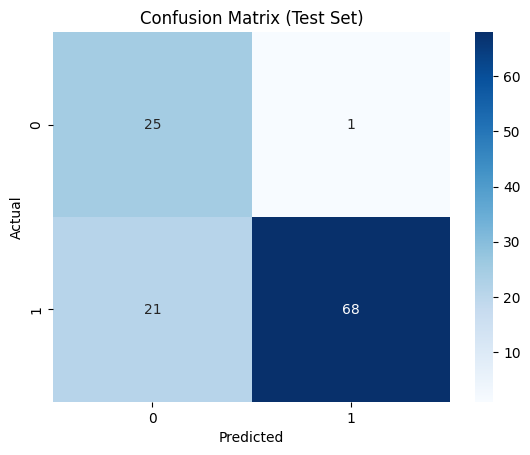

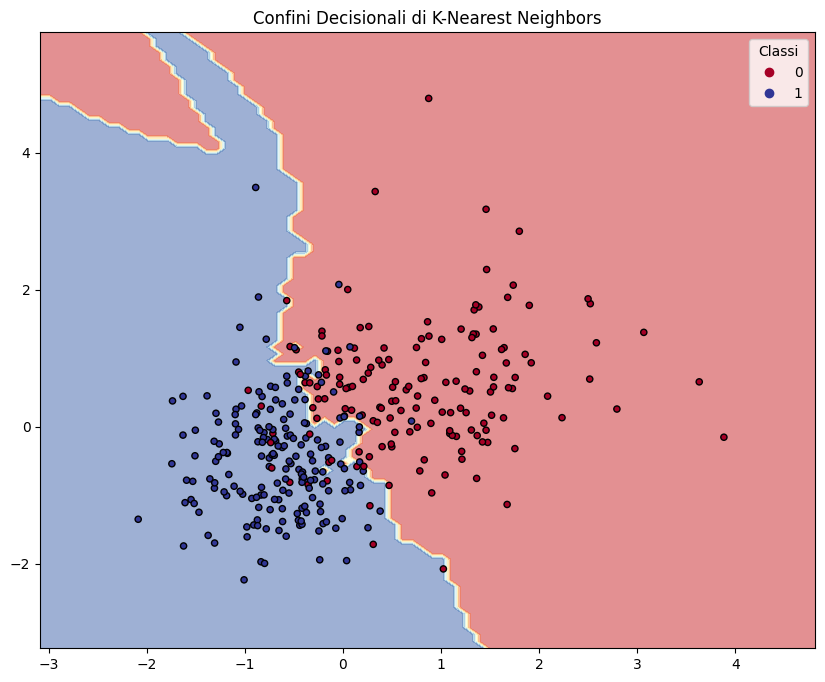

In [186]:
# Visualizzazione con due feature

# Selezioniamo solo le prime due feature
X_train_2f = X_train[:, :2]
X_validation_2f = X_validation[:, :2]
X_test_2f = X_test[:, :2]

# Standardizzazione
scaler = StandardScaler()
X_train_2f = scaler.fit_transform(X_train_2f)
X_validation_2f = scaler.transform(X_validation_2f)
X_test_2f = scaler.transform(X_test_2f)

# Creiamo e addestriamo il K-NN
model2 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
model2.fit(X_train_2f, y_train)

# Predizioni
y_predictions_test = model2.predict(X_test_2f)
y_predictions_validation = model2.predict(X_validation_2f)

# Confusion matrix
cm = confusion_matrix(y_test, y_predictions_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Visualizziamo il confine decisionale
plot_decision_boundary(model2, X_train_2f, y_train)

(341, 2)
(113, 2)


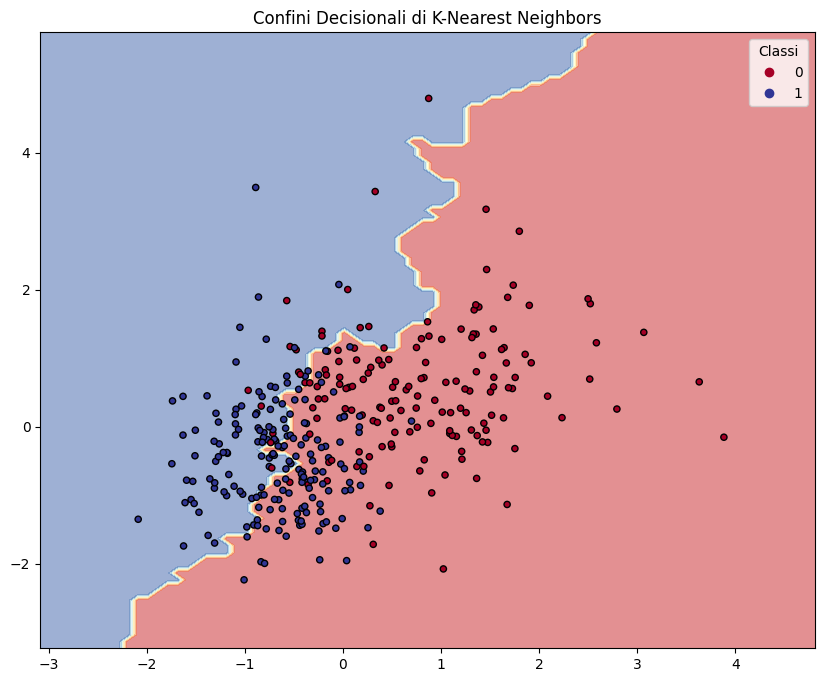

In [187]:
# Visualizzazione con PCA
from sklearn.decomposition import PCA

# Applichiamo PCA per ridurre il dataset a 2 dimensioni. ATTENZIONE: per applicare PCA dobbiamo prima standardizzare.


scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train)
X_validation_3 = scaler.transform(X_validation)

# Applichiamo PCA per ridurre il dataset a 2 dimensioni. ATTENZIONE: per applicare PCA dobbiamo prima standardizzare.
pca = PCA(n_components=2) 
X_train_3 = pca.fit_transform(X_train_3) 
X_validation_3 = pca.transform(X_validation_3)

print(X_train_3.shape)
print(X_validation_3.shape)


# Classificatore KNN su dati PCA
model2 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
model2.fit(X_train_3, y_train)
y_predictions_validation = model2.predict(X_validation_3)
cm = confusion_matrix(y_validation, y_predictions_validation)

# Plot
plot_decision_boundary(model2, X_train, y_train)


## **Esercizio 2: valutare le prestazioni di K-NN al variare di k e metrica**

Valutiamo come variano le prestazioni del classificatore al variare di:

* **k:** usiamo diversi valori di k.

* **metrica**: usiamo diverse distanze, non solo quella euclidea.


### **Guida:**

1. **Testiamo il classificatore al variare del parametro:** che sia il k o la distanza, dobbiamo istanziare, allenare e valutare il classificatore per ogni valore che ci interessa. Alla fine di ogni test che effettuiamo, saliamo il valore di accuracy ottenuto in una lista.

2. **Valutazione grafica:** utilizziamo la funzione di plot per valutare quale valore del parametro di interesse ci fa ottenere la performance migliore.



In [188]:
# Funzione per la valutazione grafica

def plot_accuracy_k(k_values, train_scores, test_scores):
    plt.figure(figsize=(12, 6))
    
    plt.plot(k_values, train_scores, 'o-', label='Accuratezza Training')
    plt.plot(k_values, test_scores, 'o-', label='Accuratezza Testing')
    
    plt.xlabel('Numero di k')
    plt.ylabel('Accuratezza')
    plt.title('KNN: Accuratezza vs. Valore di k')
    plt.legend()
    plt.grid(True)
    plt.show()

[1.0, 0.9618768328445748, 0.9736070381231672, 0.967741935483871, 0.967741935483871, 0.9648093841642229, 0.9618768328445748, 0.9589442815249267, 0.9618768328445748, 0.9589442815249267, 0.9648093841642229, 0.9618768328445748, 0.9648093841642229, 0.9618768328445748]
[0.9217391304347826, 0.8521739130434782, 0.9478260869565217, 0.9304347826086956, 0.9565217391304348, 0.9565217391304348, 0.9652173913043478, 0.9478260869565217, 0.9652173913043478, 0.9478260869565217, 0.9652173913043478, 0.9478260869565217, 0.9565217391304348, 0.9565217391304348]


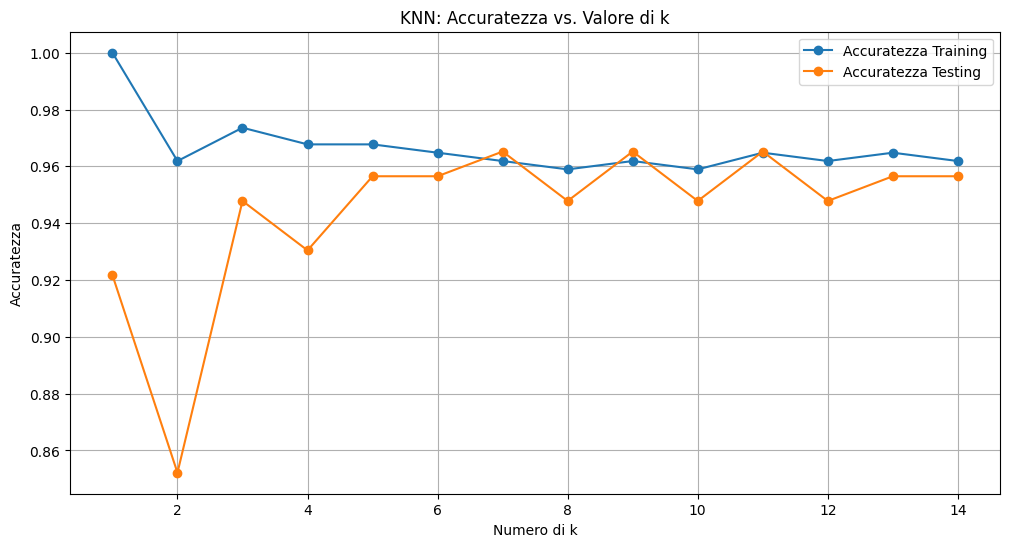

In [189]:
# Valutiamo le performance al variare di k

k_values = range(1, 15) 
train_scores = []
test_scores = []

# Istanziamo, alleniamo e valutiamo un K-NN per ogni valore di k 

# svolgimento...
for k in k_values:
    #creo il modello
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    #alleno il modello
    model.fit(X_train, y_train)
    #trovo le predizioni
    y_predictions_test_k = model.predict(X_test)
    y_predictions_train_k = model.predict(X_train)
    #accuracy 
    accuracy_test_k = accuracy_score(y_test, y_predictions_test_k)
    accuracy_train_k = accuracy_score(y_train, y_predictions_train_k)
    #mi salvo le accuraci nei vettori
    train_scores.append(accuracy_train_k)
    test_scores.append(accuracy_test_k)

print(train_scores)
print(test_scores)
plot_accuracy_k(k_values, train_scores, test_scores)

# Visualizziamo le performance al variare di k
# N.B. la funzione plot_accuracy_k ha bisogno dei parametri k_values, train_scores, test_scores.

# svolgimento...


#il modello a k=3 è buono perche le accuracy si avvicinano, aumentare troppo k però non è buono perchè già a k=7 va bene mentre k troppo alto ci sono troppi calcoli

In [190]:
# Funzione per plottare l' accuracy al variare delle metriche

def plot_accuracy_metric(metrics, train_scores, test_scores):
    bar_width = 0.35
    x = np.arange(len(metrics))  

    plt.figure(figsize=(12, 6))

    color_train = plt.cm.RdYlBu(0.9)  
    color_test = plt.cm.RdYlBu(0.4)   

    bars_train = plt.bar(x - bar_width/2, train_scores.values(), width=bar_width, label='Training', color=color_train)
    bars_test = plt.bar(x + bar_width/2, test_scores.values(), width=bar_width, label='Testing', color=color_test)

    plt.xticks(ticks=x, labels=metrics)  
    plt.xlabel('Metriche')
    plt.ylabel('Accuratezza')
    plt.title('KNN: Accuratezza vs. Metriche')
    plt.legend(loc='lower right')
    plt.grid(axis='y')
    
    for bar in bars_train:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    for bar in bars_test:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    plt.show()

{'euclidean': 0.9618768328445748, 'manhattan': 0.967741935483871, 'minkowski': 0.9618768328445748, 'cosine': 0.9560117302052786}
{'euclidean': 0.9652173913043478, 'manhattan': 0.9739130434782609, 'minkowski': 0.9652173913043478, 'cosine': 0.9565217391304348}


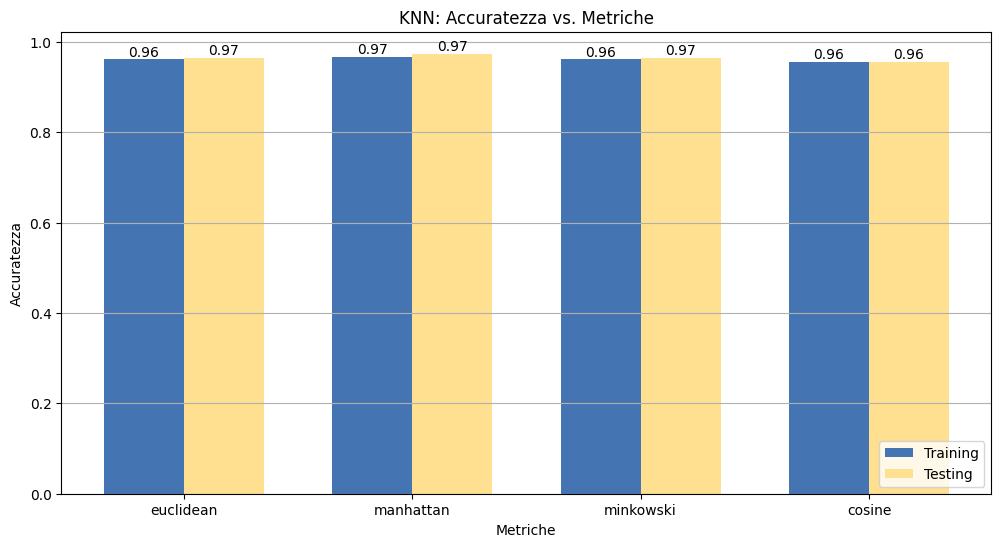

In [191]:
# Valutiamo le performance al variare della metrica
# in questo caso le performance devono essere salvate in un dizionario. Ogni chiave sarà il nome della metrica usata, il valore corrispondente invece sarà l' accuracy ottenuta.

metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
test_scores = {}
train_scores = {}

# Istanziamo, alleniamo e valutiamo un K-NN per ogni metrica. Utilizziamo k=5.
for metric in metrics:
    #creo il modello
    model = KNeighborsClassifier(n_neighbors= 7, weights='uniform', metric= metric)
    #alleno il modello
    model.fit(X_train, y_train)
    #trovo le predizioni
    y_predictions_test_metrics = model.predict(X_test)
    y_predictions_train_metrics = model.predict(X_train)
    #accuracy 
    accuracy_test_metrics = accuracy_score(y_test, y_predictions_test_metrics)
    accuracy_train_metrics = accuracy_score(y_train, y_predictions_train_metrics)
    #mi salvo le accuraci nei vettori
    train_scores[metric] = accuracy_train_metrics
    test_scores[metric] = accuracy_test_metrics

print(train_scores)
print(test_scores)
plot_accuracy_metric(metrics, train_scores, test_scores)

# svolgimento...


# Visualizziamo le performance al variare della metrica
# N.B. la funzione plot_accuracy_metric ha bisogno dei parametri metrics, train_scores, test_scores.

# svolgimento...

## **Esercizio 2: Implementare Decision Trees**

Per implementare il classificatore Decision Tree, utilizzeremo la classe `sklearn.tree.DecisionTreeClassifier` presente in `scikit-learn`. La documentazione è disponibile [a questo link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Di seguito vediamo i parametri chiave che bisogna specificare al momento della creazione dell'istanza:

* **`criterion`**: Funzione da utilizzare per misurare la qualità di uno split. 

* **`max_depth`**: Profondità massima dell'albero. Limitare la profondità aiuta a prevenire l'overfitting.

* **`min_samples_split`**: Numero minimo di campioni richiesti per dividere un nodo. Valori più alti rendono l'albero più conservativo.

* **`min_samples_leaf`**: Numero minimo di campioni che devono essere presenti in un nodo foglia. Prevenire nodi foglia con pochi campioni può migliorare la generalizzazione.


### Esempio di sintassi per istanziare, addestrare e predire

```python
# Importo DecisionTreeClassifier da scikit-learn
from sklearn.tree import DecisionTreeClassifier

# 1. Instanzio il modello Decision Tree
# Durante la creazione dell'istanza imposto i parametri che desidero
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

# 2. Train del modello utilizzando il metodo .fit()
model.fit(X_train, y_train)

# 3. Calcolo delle predizioni utilizzando il metodo .predict()
predictions = model.predict(X_test)


## **Esercizio 3: Istanziare allenare e valutare un modello DecisionTree**

In linea con quanto visto finora, istanziamo, alleniamo e valutiamo un modello di DecisionTree. Utilizziamo:

* `criterion`=`'entropy'`

* `random_state` = 42 

Il valore di `random_state` non ha un significato particolare, ma ci permette di rendere l' esperimento deterministico. 

I passaggi per questo esercizio sono uguali a quanto visto in precedenza per K-NN.

In [192]:
# Importiamo DecisionTree 
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [193]:
# Step 1 - Creiamo un albero decisionale

# svolgimento...
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)


# Step 2 - Alleniamo il modello

# svolgimento...
model.fit(X_train, y_train)

# Step 3 - Calcoliamo le predizioni
predictions_test = model.predict(X_test)
predictions_validation = model.predict(X_validation)
# svolgimento...


# Step 4 - Valutiamo il modello, calcoliamo accuracy e confusion matrix
accuracy_test = accuracy_score(y_test, predictions_test)
accuracy_validation = accuracy_score(y_validation, predictions_validation)

cm = confusion_matrix(y_validation,predictions_validation)

# svolgimento...

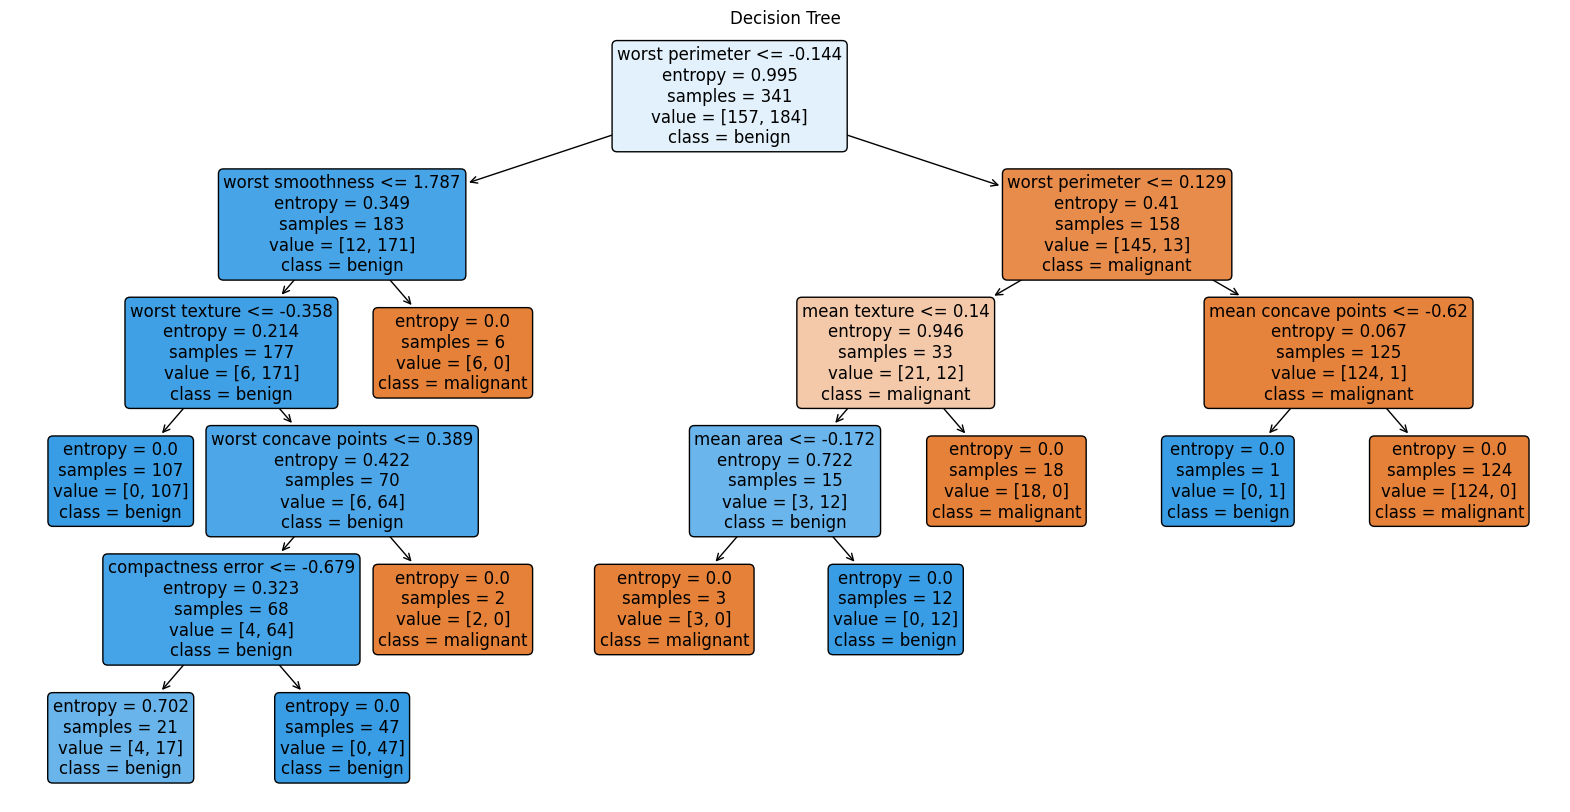

In [194]:
# Visualizzazione dell'albero creato
# dovete sostituire alla funzione plot_tree il primo parametro. Nello specifico dovete sostituirlo con il nome che avete dato al vostro DecisionTree.

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=target_names, 
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree')
plt.show()


## **Esercizio 4: Valutiamo le performance di un DecisionTree al variare di alcuni parametri**

Come abbiamo fatto per K-NN, vogliamo valutare come variano le performance di un Decision Tree al variare di alcuni parametri. Nello specifico vogliamo valutare il modello al variare di:

* **`max_depth`**: Profondità massima dell'albero. 


In [195]:
# Funzione per plottare l' accuracy al variare della max_depth del modello

def plot_accuracy_depth(k_values, train_scores, test_scores):
    plt.figure(figsize=(12, 6))
    
    plt.plot(k_values, train_scores, 'o-', label='Accuratezza Training')
    plt.plot(k_values, test_scores, 'o-', label='Accuratezza Testing')
    
    plt.xlabel('Profondità massima dell\'albero')
    plt.ylabel('Accuratezza')
    plt.title('Decision Tree: Accuratezza vs. Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

[0.9442815249266863, 0.9736070381231672, 0.9882697947214076, 0.9882697947214076]
[0.8434782608695652, 0.8869565217391304, 0.8869565217391304, 0.8782608695652174]


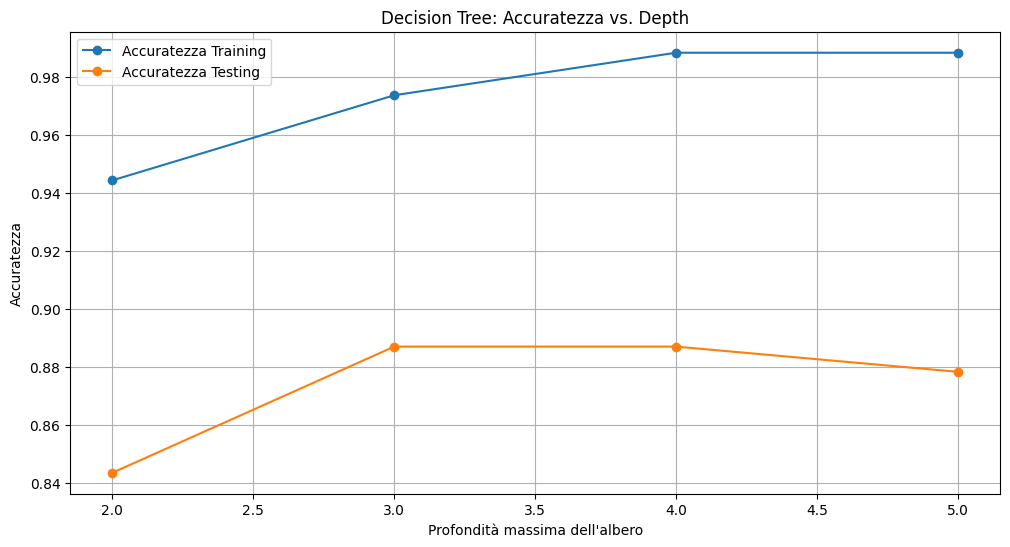

In [196]:
# Confrontiamo alberi con diverse profondità massime

max_depths = [2, 3, 4, 5]
train_accuracy = []
test_accuracy = []

# Istanziamo, alleniamo e valutiamo un DecisionTree per ogni valore di max_depth
for max_depth in max_depths:
    model_DT2= DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=10)
    model_DT2.fit(X_train, y_train)
    predictions_test_max = model_DT2.predict(X_test)
    predictions_train_max = model_DT2.predict(X_train)
    accuracy_test_max = accuracy_score(y_test, predictions_test_max)
    accuracy_train_max = accuracy_score(y_train, predictions_train_max)
    train_accuracy.append(accuracy_train_max)
    test_accuracy.append(accuracy_test_max)

# svoglimento...
print(train_accuracy)
print(test_accuracy)
plot_accuracy_depth(max_depths, train_accuracy, test_accuracy)

# Visualizziamo l'effetto della profondità sull'accuratezza

# svolgimento...

## **Esercizio 5: Ottimizzazione Decision Tree con GridSearch e Cross Validation**

Possiamo ottimizzare le performance di un Decision Tree specificando ulteriori parametri. Lo scopo di questo esercizio è trovare la miglior combinazione di parametri che massimizza l' accuracy del nostro modello. Per trovare questa configurazione utilizzeremo la funzione `GridSearchCV` che effettua Grid Search e Cross Validation contemporaneamente.

Innanzitutto proviamo a istanziare un Decision Tree specificando più parametri. Nello specifico impostiamo:

* `max_depth` = `3`

* `min_samples_split` = `5`

* `min_samples_leaf` = `2`

Vediamo se l' aggiunta di questi parametri incrementa le performance ottenute precedentemente.

Ovviamente i parametri impostati precedentemente devono essere mantenuti.

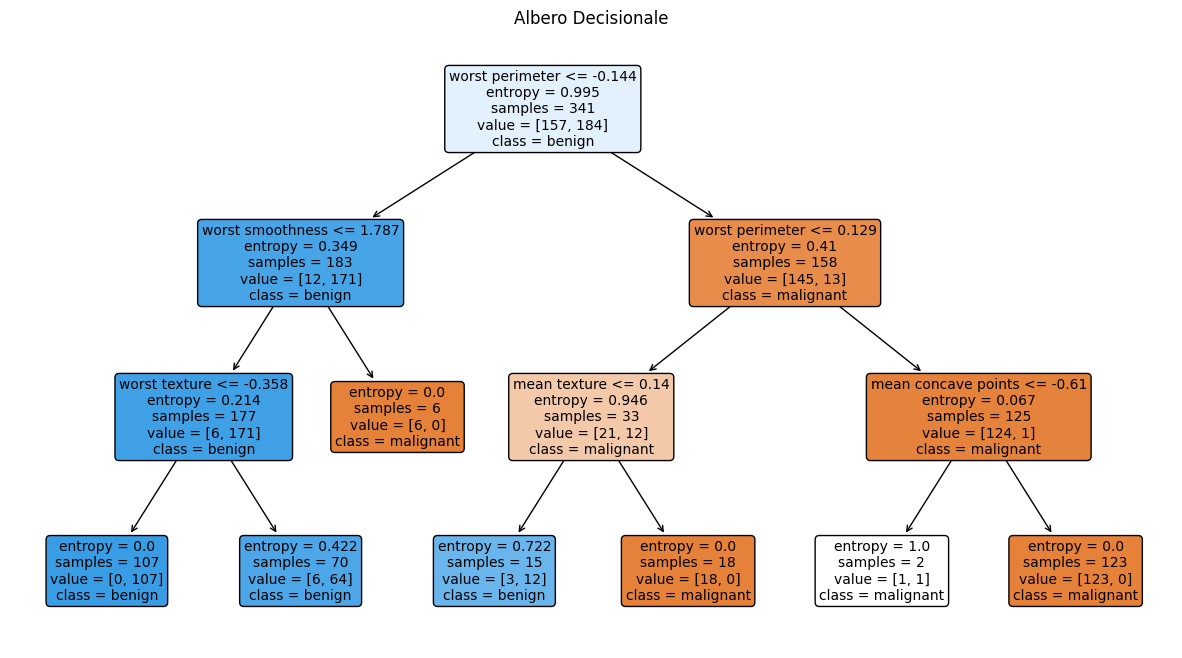

In [197]:
# Albero ottimizzato con parametri più controllati

# Istanziamo il nuovo albero specificando tutti i parametri di cui abbiamo bisogno.

# svolgimento...
model_DT3= DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf = 2)
model_DT3.fit(X_train, y_train)
predictions_test_DT3 = model_DT2.predict(X_test)
predictions_validation_DT3 = model_DT3.predict(X_validation)
accuracy_test_DT3 = accuracy_score(y_test, predictions_test_DT3)
accuracy_validation_DT3 = accuracy_score(y_validation, predictions_validation_DT3)

# Alleniamo l' albero

# svolgimento...


# Effettuare le predizioni del nuovo albero allenato

# svolgimento...


# Rappresentiamo il nuovo albero
# Dovete sostituire il primo parametro della funzione plot_tree con il nome del vostro albero.

plt.figure(figsize=(15, 8))
plot_tree(model_DT3, feature_names=feature_names, class_names=target_names, 
          filled=True, rounded=True, fontsize=10)
plt.title('Albero Decisionale')
plt.show()

#### **Importanza delle features**

Possiamo estrarre dal nostro modello Decision Tree l' importanza delle singole feature, cioè quanto una feature aiuda a ridurre il criterio scelto, l' entropia nel nostro caso. 

Questa informazione è contenuta in `.feature_importances_`. 

Una volta estratti questi valori, ordiniamoli in ordine decrescente e utilizziamo la funzione `plot_top_feature_importance` definita nella cella seguente per rappresentarne il grafico. La funzione richiede due parametri:

* **Vettore importanze:** il vettore contenente l' importanza delle features ottenuto dall' estrazione.

* **Nomi delle features:** i nomi delle feature che abbiamo estratto all' inizio dell' esercitazione quando abbiamo importato il dataset.

In [198]:
def plot_top_feature_importance(importances, feature_names):
    # Ordina le importanze e ottieni i primi `top_n` indici
    top_n=10
    indices = np.argsort(importances)[::-1][:top_n]

    plt.figure(figsize=(10, 6))
    plt.title('Importanza delle Feature')
    
    # Plotta solo le prime `top_n` barre
    plt.bar(range(top_n), importances[indices], align='center', color='skyblue')
    
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importanza')
    plt.tight_layout()  # Aggiunge spazio tra i lati del grafico
    plt.show()

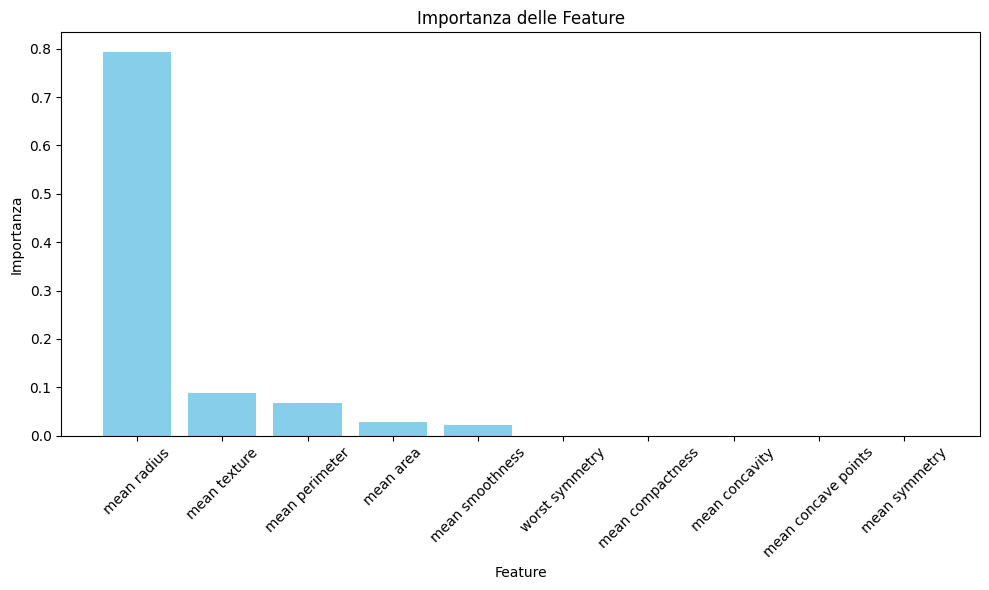

In [199]:
# Estrai l' importanza delle features da .feature_importances_
importances = model_DT3.feature_importances_

# svolgimento...


# Riordina in ordine decrescente
indici = np.argsort(importances)[::-1]
importances = importances[indici]
# svolgimento...


# Rappresentiamo il grafico
plot_top_feature_importance(importances, feature_names)
# svolgimento...

### **Grid search**

Poichè i parametri impostabili in un modello sono numerosi testare le singole configurazioni è dispendioso. Tuttavia la ricerca dei parametri ottimali è l' unico modo che abbiamo per assicurarci di estrarre la miglior performance dal nostro modello. In questi casi ci sono diverse strateggie per cercare la configurazione migliore. Una di questa è la **Grid search** (letteralmente **ricerca a griglia**) che consiste nel testare tutte le possibili configurazioni e selezionare la migliore. Chiaramente testare tutte le configurazioni rende il grid search un algoritmo molto dispendioso dal punto di vista computazionale.

Possiamo implementare un algoritmo di grid search utilizzando la classe `GridSearchCV` di `sklearn` che effettua contemporaneamente ricerca a griglia e cross-validation. 

#### Guida per Grid Search:

I seguenti passaggi devono guidarvi all' utilizzo di `GridSearchCV` per trovare la miglior configurazione per un modello di DecisionTree per il nostro dataset.

1. **Istanziamo un' oggetto `GridSearchCV`:** per creare l' oggetto `GridSearchCV` dobbiamo specificare i seguenti parametri

    * Modello che vogliamo usare

    * Dizionario contenente come chiavi i parametri che vogliamo testare, e come value i valori che vogliamo impiegare

    * `cv` cioè il nomero di fold che vogliamo utilizzare per la cross-validaton

    * `scoring` ovvero la metrica da utilizzare per valutare, ad esempio `accuracy`

2. **Eseguire Grid Search:** utilizziamo il metodo `.fit()` dell' oggetto `GridSearchCV` definito al punto 1 per eseguire l' algoritmo

3. **Stampare configurazione migliore:** dopo aver eseguito il `.fit()`, l' oggetto `GridSearchCV` ci permette di accedere ad alcuni attributi:

    * `.best_params_`: un dizionario che rappresenta la miglior configurazione.

    * `.best_scores_`: il valore migliore ottenuto come accuracy.

    * `.best_estimator_`: il modello allenato con la configurazione migliore. 

In [200]:
# Step 1 - Istanziare l' oggetto GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definizione del grid di parametri
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy']
}

Grid = GridSearchCV(model_DT3,param_grid,cv = 4,scoring = 'accuracy')

# svolgimento...


In [201]:
# Step 2 - Eseguire Grid Search

# svolgimento...
Grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=2,
                                              min_samples_split=5),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [202]:
# Step 3 - Stampare i risultati
# Stampare la migliore configurazione e la migliore accuracy
print(Grid.best_params_)
print(Grid.best_score_)
print(Grid.best_estimator_)

# svolgimento...

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.9413474692202464
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=10)


# **Esercizio 6: Model Selection classificatori**

Avendo affrontato tutti i classificatori visti in questo corso, possiamo adesso procedere alla fase di **model selection**. Vogliamo trovare quale classificatore la relativa configurazione che meglio performano su uno specifico dataset. 

### **Dataset**

Per questo esercizio utilizzeremo il dataset `Vehicle Silhouette` che trovato al seguente [link](https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes). Il dataset contiene 846 campioni su 18 features, e contiene informazioni circa le dimensioni di alcuni veicoli. L' obiettivo è classificare ogni campione in 4 possibili classi. 

In [203]:
!pip install ucimlrepo

In [204]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X = statlog_vehicle_silhouettes.data.features 
y = statlog_vehicle_silhouettes.data.targets 

y_flat = np.ravel(y)
y_series = pd.Series(y_flat)

print("Distribuzione delle classi (prima):")
print(y_series.value_counts())

classi_da_mantenere = y_series.value_counts()[y_series.value_counts() > 1].index
print("\nClassi da mantenere (con >1 campione):", list(classi_da_mantenere))

mask = y_series.isin(classi_da_mantenere)

X = X[mask]
y = y_series[mask]

print("\nDistribuzione delle classi dopo il filtraggio:")
print(y.value_counts())
#in partica abbiamo tolto le classi con 1 solo campione 

Distribuzione delle classi (prima):
saab    217
bus     217
opel    212
van     199
204       1
Name: count, dtype: int64

Classi da mantenere (con >1 campione): ['saab', 'bus', 'opel', 'van']

Distribuzione delle classi dopo il filtraggio:
saab    217
bus     217
opel    212
van     199
Name: count, dtype: int64


In [205]:
# svolgimento... aggiungere nell'homework la gestione dei parametri per ogni modello attraverso la GridSearch



#devo instanziare,allenare e valutare 4 modelli sui dati X,Y;
#i modelli di classificazione da utilizzare sono: 1. Regressione Logistica, 2. SVM, 3. K-NN, 4. Decision Tree

#prima di istanziare i modelli devo suddividere il data set in traning(train e validation) e test
train_fraction = 0.6  
validation_fraction = 0.2  
test_fraction = 0.2


num_train = int(train_fraction * X.shape[0])
num_validation = int(validation_fraction*X.shape[0])

X_train = X[:num_train]
y_train = y[:num_train]
X_validation = X[num_train:num_train+num_validation]
y_validation = y[num_train:num_train+num_validation]
X_test = X[num_train+num_validation:]
y_test = y[num_train+num_validation:]

print("Train shape:", X_train.shape)
print("Validation shape:", X_validation.shape)
print("Test shape:", X_test.shape)

# Dopo aver suddiviso i dati li standardizzo 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)



Train shape: (507, 18)
Validation shape: (169, 18)
Test shape: (169, 18)


In [206]:
#adesso devo istanziare, allenare e valutare ogni modello 
#modello Regressione Logistica
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1 - Creazione del modello
model_log = LogisticRegression(max_iter=100, solver='liblinear',C=1.0)
# Step 2 - Addestramento del modello
model_log.fit(X_train, y_train)
# Step 3 - Calcolo delle predizioni
y_predictions_validation_log = model_log.predict(X_validation)
y_predictions_test_log = model_log.predict(X_test)
# Step 4 - Calcolo dell' accuracy
from sklearn.metrics import accuracy_score

accuracy_validation_log = accuracy_score(y_validation, y_predictions_validation_log)
accuracy_test_log = accuracy_score(y_test, y_predictions_test_log)

print("Accuracy validation: ", accuracy_validation_log)
print("Accuracy test: ", accuracy_test_log)



Accuracy validation:  0.727810650887574
Accuracy test:  0.8047337278106509


In [207]:
#modello SVM con kernel linear e C = 0.01 
# Step 1 - Creazione del modello
from sklearn.svm import SVC
import numpy as np

model_SVM_linear = SVC(kernel='linear', C=0.01)

# Step 2 - Addestramento del modello
model_SVM_linear.fit(X_train, y_train)

# Step 3 - Calcolo delle predizioni
y_predictions_test_SVM_linear= model_SVM_linear.predict(X_test)
y_predictions_validation_SVM_linear = model_SVM_linear.predict(X_validation)
# Step 4 - Calcolo dell' accuracy
from sklearn.metrics import accuracy_score

accuracy_validation_SVM_linear = accuracy_score(y_validation, y_predictions_validation_SVM_linear)
accuracy_test_SVM_linear = accuracy_score(y_test, y_predictions_test_SVM_linear)

print("Accuracy validation: ", accuracy_validation_SVM_linear)
print("Accuracy test: ", accuracy_test_SVM_linear)

Accuracy validation:  0.5976331360946746
Accuracy test:  0.650887573964497


In [208]:
#modello K_NN (In questo caso abbiamo come parametri K e la metrica)
#potremmo ricercare quale configurazione tra parametri e metrica siano migliori
#in questo caso utilizzo k=5 e come metrica l'euclidea 
from sklearn.neighbors import KNeighborsClassifier

# Step 1 - Instanzio il modello KNN
model_KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
# Step 2 - Alleno il modello KNN
model_KNN.fit(X_train, y_train)
# Step 3 - Faccio le previsioni
y_predictions_test_KNN = model_KNN.predict(X_test)
y_predictions_validation_KNN = model_KNN.predict(X_validation)
# Step 4 - Calcolo le accuracy
from sklearn.metrics import accuracy_score

accuracy_validation_KNN = accuracy_score(y_validation, y_predictions_validation_KNN)
accuracy_test_KNN = accuracy_score(y_test, y_predictions_test_KNN)

print("Accuracy validation: ", accuracy_validation_KNN)
print("Accuracy test: ", accuracy_test_KNN)



#utilizzo invece la GridSearch
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # notare: 'scaler' minuscolo
    ('knn', KNeighborsClassifier(weights='uniform'))  # notare: 'knn' minuscolo
])

# Definisco il grid di parametri - ATTENZIONE minuscole!
param_grid = {
    'knn__n_neighbors': range(1, 15),  # knn__ non Knn__
    'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
}

# Setup GridSearchCV
Grid = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy')

# Eseguo Grid Search
Grid.fit(X_train, y_train)

# Stampare la migliore configurazione e la migliore accuracy
print(Grid.best_estimator_)
print(Grid.best_score_)
best_model_KNN = Grid.best_estimator_
y_predictions_test_KNN = best_model_KNN.predict(X_test)
accuracy_test_KNN = accuracy_score(y_test, y_predictions_test_KNN)

print(accuracy_test_KNN)

Accuracy validation:  0.650887573964497
Accuracy test:  0.7100591715976331
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(metric='cosine', n_neighbors=1))])
0.7199725034370704
0.7041420118343196


In [209]:
#modello SVM con Kernel a base radiale e C = 0.01
# Step 1 - Creazione del modello
from sklearn.svm import SVC
import numpy as np

model_SVM_RBF = SVC(kernel='rbf', C=0.01)

# Step 2 - Addestramento del modello
model_SVM_RBF.fit(X_train, y_train)

# Step 3 - Calcolo delle predizioni
y_predictions_test_SVM_RBF = model_SVM_RBF.predict(X_test)
y_predictions_validation_SVM_RBF = model_SVM_RBF.predict(X_validation)
# Step 4 - Calcolo dell' accuracy
from sklearn.metrics import accuracy_score

accuracy_validation_SVM_RBF = accuracy_score(y_validation, y_predictions_validation_SVM_RBF)
accuracy_test_SVM_RBF = accuracy_score(y_test, y_predictions_test_SVM_RBF)

print("Accuracy validation: ", accuracy_validation_SVM_RBF)
print("Accuracy test: ", accuracy_test_SVM_RBF)


Accuracy validation:  0.20118343195266272
Accuracy test:  0.2603550295857988


In [210]:
#modello SVM con GridSearch
# 1. Creo la pipeline: normalizzazione + SVM
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),  # normalizzo sempre per SVM
    ('svm', SVC())
])

# 2. Definisco il grid di parametri
param_grid = {
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': [0.1, 1, 10, 100]
}

# 3. Setup GridSearchCV
grid = GridSearchCV(pipeline2, param_grid, cv=4, scoring='accuracy')

# 4. Eseguo Grid Search
grid.fit(X_train, y_train)
# Stampare la migliore configurazione e la migliore accuracy
print(grid.best_estimator_)
best_model_SVM = grid.best_estimator_
y_predictions_test_SVM = best_model_SVM.predict(X_test)
accuracy_test_SVM = accuracy_score(y_test, y_predictions_test_SVM)

print(accuracy_test_SVM)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=100))])
0.8106508875739645


In [211]:
#modello Decision Tree (Utilizziamo la GridSearch per valutare la migliore configuazione degli iperparametri)
# Step 1 - Instanzio il modello DT
model_DT= DecisionTreeClassifier(random_state = 42)



#APPLICO GRIDSEARCH
# Step 1 - Istanziare l' oggetto GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definizione del grid di parametri
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy']
}

Grid = GridSearchCV(model_DT,param_grid,cv = 4,scoring = 'accuracy')
# Step 2 - Eseguire Grid Search
Grid.fit(X_train, y_train)
# Step 3 - Stampare i risultati
# Stampare la migliore configurazione e la migliore accuracy
print(Grid.best_estimator_)
best_model = Grid.best_estimator_
y_predictions_test_DT = best_model.predict(X_test)
accuracy_test_DT = accuracy_score(y_test, y_predictions_test_DT)

print(accuracy_test_DT)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=42)
0.7041420118343196


In [212]:
#questo è un codice tutto insieme che rifa le stesse cose di prima ma in modo piu compatto utilizzando funzioni e facendo automaticamente la scelta del modello con accuracy migliore

# Funzione per modelli con GridSearch
def train_with_gridsearch(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_score_

# Funzione per modelli senza GridSearch (es. Logistic Regression semplice)
def train_simple(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

# Funzione per valutare un modello
def evaluate_model(model, X_test, y_test, X_validation, y_validation):
    y_test_pred = model.predict(X_test)
    y_validation_pred = model.predict(X_validation)
    test_acc = accuracy_score(y_test, y_test_pred)
    validation_acc = accuracy_score(y_validation, y_validation_pred)
    return test_acc, validation_acc

# ================================
# 1. Logistic Regression (senza GridSearch)
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000))
])
logreg_model = train_simple(pipeline_logreg, X_train, y_train)
test_acc_logreg, validation_acc_logreg = evaluate_model(logreg_model, X_test, y_test, X_validation, y_validation)

# ================================
# 2. SVM (con GridSearch)
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
param_grid_svm = {
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__C': [0.1, 1, 10, 100]
}
svm_model, best_score_svm = train_with_gridsearch(pipeline_svm, param_grid_svm, X_train, y_train)
test_acc_svm, validation_acc_svm = evaluate_model(svm_model, X_test, y_test, X_validation, y_validation)

# ================================
# 3. KNN (con GridSearch)
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid_knn = {
    'knn__n_neighbors': range(1, 15),
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_model, best_score_knn = train_with_gridsearch(pipeline_knn, param_grid_knn, X_train, y_train)
test_acc_knn, validation_acc_knn = evaluate_model(knn_model, X_test, y_test, X_validation, y_validation)

# ================================
# 4. Decision Tree (con GridSearch)
tree_model = DecisionTreeClassifier()
param_grid_tree = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
tree_model, best_score_tree = train_with_gridsearch(tree_model, param_grid_tree, X_train, y_train)
test_acc_tree, validation_acc_tree = evaluate_model(tree_model, X_test, y_test, X_validation, y_validation)

# ================================
# Confronto Finale #tabella
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy Validation': [validation_acc_logreg, validation_acc_svm, validation_acc_knn, validation_acc_tree],
    'Accuracy Test': [test_acc_logreg, test_acc_svm, test_acc_knn, test_acc_tree]
})

print(results.sort_values(by='Accuracy Test', ascending=False))
#tabella ordinata in modo decrescente in base all'accuracy test
#in base ai risulati ottenuti sia con il codice precedente sia con quest'utlimo il miglior modello per questi dati in base all'accuracy e' l'SVM con parametri kernel = svm e C = 100

                 Model  Accuracy Validation  Accuracy Test
0  Logistic Regression             0.751479       0.810651
1                  SVM             0.739645       0.810651
2                  KNN             0.686391       0.775148
3        Decision Tree             0.639053       0.727811
